### 工房第４回レポート課題
課題再掲：ニューラルネットワークの学習アルゴリズムをPython+Numpyを使って実装する。下記のサンプルコードを実行してMNISTデータを学習する。
結果：20epochでテストデータの推論精度は96.4%であった。
考察：前回課題の２層のニューラルネットワークのテストデータ推論精度は97.4%よりも低い精度となった。これは学習に使ったデータ量の差が影響したものと考えられる。すなわち、学習の手法が良くてもデータ量が不足していれば汎化性能は上がらないことを意味している。一方で、演算性能と十分なデータがあれば多少の学習手法の差はあっても、優れた学習モデルを構築できるということも示している。
感想：正直なところ、CNNやその他学習効率を上げる手法を十分に理解したとは言えないがPytorch学習を進めながら理解を深めたいと思う。Pytorchによる環境設定は、M1 Macbookは少し特殊な設定なようだったが完了した（おそらく）。

train loss:2.3001650301786567
=== epoch:1, train acc:0.319, test acc:0.32 ===
train loss:2.2974395981285616
train loss:2.292348570857784
train loss:2.2839533850430924
train loss:2.2734563129001883
train loss:2.2667523152285955
train loss:2.256169388244361
train loss:2.2205037042698264
train loss:2.1960293691638966
train loss:2.176144612626978
train loss:2.1357837101881634
train loss:2.0840597709275226
train loss:2.032054221501896
train loss:1.973404124605487
train loss:1.9045494201221416
train loss:1.848209371527985
train loss:1.8667069948525599
train loss:1.750981247287001
train loss:1.6308824537664974
train loss:1.5427039496960853
train loss:1.4573715179604259
train loss:1.3327434378280507
train loss:1.166707173954189
train loss:1.1838451292366292
train loss:1.1098013224781418
train loss:1.1369929336792501
train loss:1.0313608189125234
train loss:0.922001338332602
train loss:0.8371551298523704
train loss:0.9525517536299469
train loss:0.8597583162316752
train loss:0.7460008945372499
t

train loss:0.2410476452180961
train loss:0.2289000773612986
train loss:0.1287982304586967
train loss:0.165593717119858
train loss:0.11785179561013465
train loss:0.1220206917326574
train loss:0.24220007472989052
train loss:0.18249171322255336
train loss:0.1730338904487333
train loss:0.11227866468107271
train loss:0.32074013124066786
train loss:0.1275486682060172
train loss:0.18824769950904552
train loss:0.28234669618288516
train loss:0.25412401486257524
train loss:0.1527683510797834
train loss:0.25920400009161026
train loss:0.09422338259935716
train loss:0.11359883405503617
train loss:0.15265813033012576
train loss:0.1631061460948387
train loss:0.18517990425463765
train loss:0.14827027531679363
train loss:0.1667268058838101
train loss:0.1030650285486598
train loss:0.24834953554011768
train loss:0.17173104614675394
train loss:0.12550766735100038
train loss:0.13305852943489999
train loss:0.10249939808703921
train loss:0.08285915970588728
train loss:0.218367537377669
train loss:0.183204715

train loss:0.1935444868086362
train loss:0.14594720230966124
train loss:0.03192943816349194
train loss:0.048019543284368395
train loss:0.07093981945888891
train loss:0.08787086118058626
train loss:0.05574365436448613
train loss:0.034141882229424415
train loss:0.030603129110434654
train loss:0.053758272747950156
train loss:0.04909090449358997
train loss:0.13927994008278125
train loss:0.08138375482435599
train loss:0.03391360726745984
train loss:0.07051286753049904
train loss:0.053760288046084
train loss:0.049737981849962865
train loss:0.07443259707270068
train loss:0.09976954409168252
train loss:0.06381066490271912
train loss:0.1664207486807341
train loss:0.1657638966355998
train loss:0.10448300833213396
train loss:0.11543129413806734
train loss:0.053879535757505786
train loss:0.09759800520502626
train loss:0.072086233852476
train loss:0.04543555578195109
train loss:0.060793737157634774
train loss:0.042417934071322286
=== epoch:12, train acc:0.967, test acc:0.942 ===
train loss:0.054143

train loss:0.04219668673826278
train loss:0.016574597337157285
train loss:0.03354043552488864
train loss:0.018667878981756744
train loss:0.048510825611702973
train loss:0.0301883626078954
train loss:0.0437188875542261
train loss:0.05552399325956854
train loss:0.033793573579411054
train loss:0.047526298169267685
train loss:0.024922295488272673
train loss:0.06189987295240042
train loss:0.12873678972761068
train loss:0.030533484493744333
train loss:0.020373925596593064
train loss:0.028522558753357456
train loss:0.02580366885974312
train loss:0.03342711500064102
train loss:0.011698023706747319
train loss:0.03286100887193835
train loss:0.04039682608505468
train loss:0.030884260142292567
train loss:0.0624110310758667
train loss:0.026382482561116537
=== epoch:17, train acc:0.986, test acc:0.951 ===
train loss:0.029181798219416796
train loss:0.07270140750805593
train loss:0.0431943980433352
train loss:0.04039548380363163
train loss:0.020685220710776088
train loss:0.053306191361740876
train los

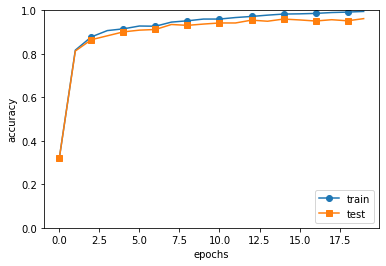

In [5]:
%matplotlib inline
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20 #20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
